In [5]:
#import libraries
import pandas as pd
import hvplot.pandas
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, median_absolute_error, mean_squared_error, r2_score, explained_variance_score


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [6]:
file = Path("Resources/clean_data_v.csv")
df = pd.read_csv(file, index_col='Unnamed: 0')
df.head()

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
y = np.array(df['price']).reshape(-1, 1)
X = df.drop(columns = 'price')

In [8]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)


In [9]:
#set up a results data frame

results = pd.DataFrame(index = ['max_error', 'median_absolute_error', 'mean_squared_error', 'r2_score', 'explained_variance_score'], 
                       columns = ['DecisionTreeRegressor', 'GradientBoostingRegressor', 'RandomForestRegressor', 'VotingRegressor' ])




In [10]:
dt_reg = DecisionTreeRegressor(max_depth = 5)

dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

results.loc['max_error','DecisionTreeRegressor'] = max_error(y_test, y_pred)
results.loc['median_absolute_error','DecisionTreeRegressor'] = median_absolute_error(y_test, y_pred)
results.loc['mean_squared_error','DecisionTreeRegressor'] = mean_squared_error(y_test, y_pred)
results.loc['r2_score','DecisionTreeRegressor'] = r2_score(y_test, y_pred)
results.loc['explained_variance_score','DecisionTreeRegressor'] = explained_variance_score(y_test, y_pred)



In [11]:
gb_reg = GradientBoostingRegressor(n_estimators =100)

gb_reg.fit(X_train, y_train)

y_pred_gb = gb_reg.predict(X_test)

results.loc['max_error','GradientBoostingRegressor'] = max_error(y_test, y_pred_gb)
results.loc['median_absolute_error','GradientBoostingRegressor'] = median_absolute_error(y_test, y_pred_gb)
results.loc['mean_squared_error','GradientBoostingRegressor'] = mean_squared_error(y_test, y_pred_gb)
results.loc['r2_score','GradientBoostingRegressor'] = r2_score(y_test, y_pred_gb)
results.loc['explained_variance_score','GradientBoostingRegressor'] = explained_variance_score(y_test, y_pred_gb)



/Users/vanyaboranova/opt/anaconda3/envs/nnenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [12]:
rf_reg = RandomForestRegressor(n_estimators =100)

rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

results.loc['max_error','RandomForestRegressor'] = max_error(y_test, y_pred_rf)
results.loc['median_absolute_error','RandomForestRegressor'] = median_absolute_error(y_test, y_pred_rf)
results.loc['mean_squared_error','RandomForestRegressor'] = mean_squared_error(y_test, y_pred_rf)
results.loc['r2_score','RandomForestRegressor'] = r2_score(y_test, y_pred_rf)
results.loc['explained_variance_score','RandomForestRegressor'] = explained_variance_score(y_test, y_pred_rf)



/Users/vanyaboranova/opt/anaconda3/envs/nnenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:

reg1 = GradientBoostingRegressor(random_state=7, n_estimators=100)
reg2 = RandomForestRegressor(random_state=7, n_estimators=100)
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2)])
ereg = ereg.fit(X_train, y_train)

y_pred_vr = ereg.predict(X_test)

results.loc['max_error','VotingRegressor'] = max_error(y_test, y_pred_vr)
results.loc['median_absolute_error','VotingRegressor'] = median_absolute_error(y_test, y_pred_vr)
results.loc['mean_squared_error','VotingRegressor'] = mean_squared_error(y_test, y_pred_vr)
results.loc['r2_score','VotingRegressor'] = r2_score(y_test, y_pred_vr)
results.loc['explained_variance_score','VotingRegressor'] = explained_variance_score(y_test, y_pred_vr)




/Users/vanyaboranova/opt/anaconda3/envs/nnenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [16]:
results

,DecisionTreeRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingRegressor
max_error,13529.6,11902.6,12575.5,11339.9
median_absolute_error,279.484,181.246,101.99,126.472
mean_squared_error,1.4382e+06,551134,320211,363351
r2_score,0.908969,0.965116,0.979732,0.977002
explained_variance_score,0.908977,0.965118,0.979734,0.977004


In [50]:
decision_tree_regressions_df = pd.DataFrame({'y_test' : y_test.reshape(1,-1)[0], 
                                            'y_pred': y_pred_rf.reshape(1,-1)[0] })

decision_tree_regressions_df.hvplot.table()

:Table   [y_test,y_pred]

In [51]:
decision_tree_regressions_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,3935.020001
std,3974.906564,3929.069213
min,327.000000,366.760000
25%,942.000000,943.970000
50%,2389.000000,2428.025000
75%,5392.000000,5371.720000
max,18806.000000,18041.670000


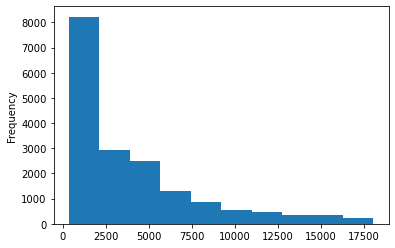

In [52]:
decision_tree_regressions_df['y_pred'].plot.hist(bins = 10)

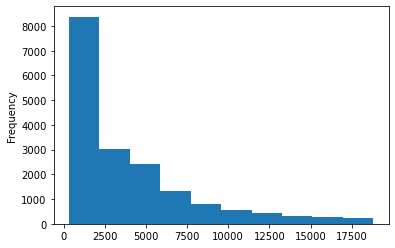

In [53]:
decision_tree_regressions_df['y_test'].plot.hist(bins = 10)

In [54]:
decision_tree_regressions_df[:300].hvplot.line(width = 1250, height =500)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [76]:
decision_tree_regressions_df.sum()

y_test    6.995484e+07
y_pred    7.004729e+07
dtype: float64

In [87]:
print(f'Total price of all diamonds in the test sample is', format(decision_tree_regressions_df.sum()[0],',.0f') )
print(f'Total predicted price of all diamonds is', format(decision_tree_regressions_df.sum()[1],',.0f'))

Total price of all diamonds in the test sample is 69,954,836
Total predicted price of all diamonds is 70,047,291


In [96]:
Total_delta = (decision_tree_regressions_df.sum()[1] - decision_tree_regressions_df.sum()[0] ) #/ 
print(f'Total delta is $', format(Total_delta, ',.0f'))
print('Delta as % of total price is', format(Total_delta/decision_tree_regressions_df.sum()[0] , ',.2%') )

Total delta is $ 92,455
Delta as % of total price is 0.13%


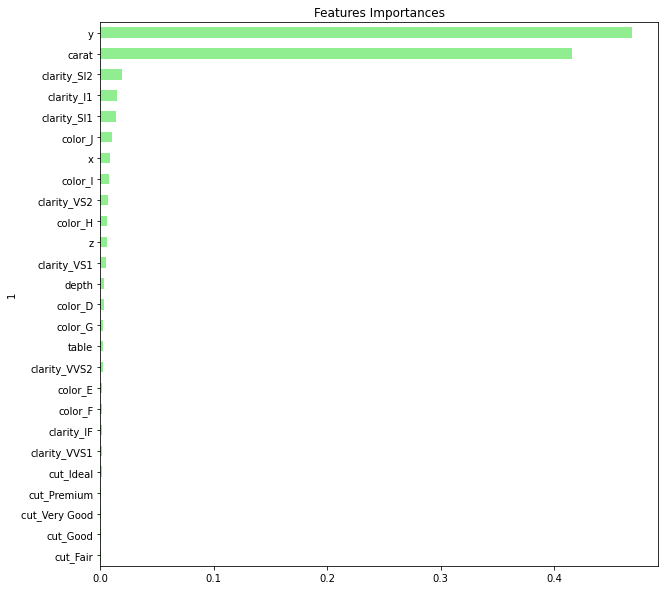

In [98]:
# List the features sorted in descending order by feature importance for Random Forrest Regressor
importances = rf_reg.feature_importances_

importances_df = pd.DataFrame(sorted(zip(  rf_reg.feature_importances_, X_train.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False, figsize = (10,10))

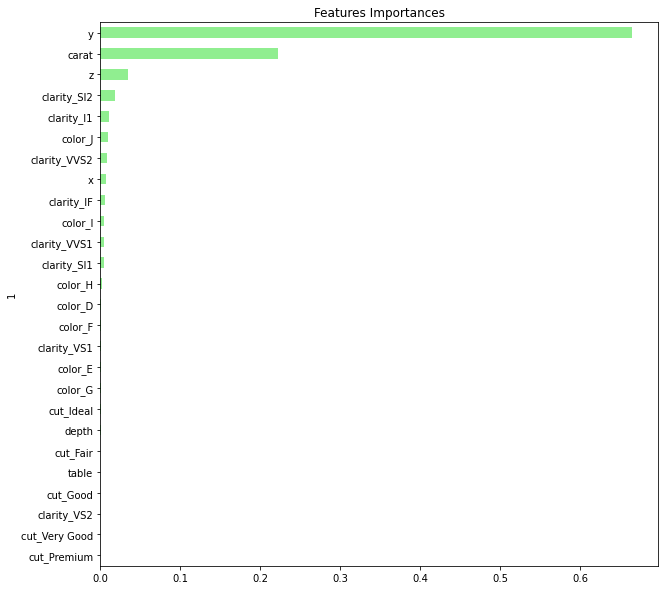

In [100]:

importances = gb_reg.feature_importances_

importances_df = pd.DataFrame(sorted(zip(  gb_reg.feature_importances_, X_train.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False, figsize = (10,10))
